# Tools

In [1]:
import h5py, numpy as np, tqdm, os, glob
from matplotlib import pyplot as plt

In [59]:
import matplotlib
matplotlib.rc('font', size=16, family='serif')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
# %matplotlib widget
%matplotlib inline

# Data

In [3]:
ls /data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/

03_samples_2_6/  05_samples_M_655/  2021_nGI_BOA.rar


In [4]:
ls /data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/

boa2021n000551.hdf  boa2021n000570.hdf  boa2021n000588.hdf  boa2021n000607.hdf
boa2021n000554.hdf  boa2021n000572.hdf  boa2021n000590.hdf  boa2021n000609.hdf
boa2021n000556.hdf  boa2021n000574.hdf  boa2021n000593.hdf  boa2021n000611.hdf
boa2021n000558.hdf  boa2021n000576.hdf  boa2021n000595.hdf  boa2021n000613.hdf
boa2021n000560.hdf  boa2021n000578.hdf  boa2021n000597.hdf  boa2021n000615.hdf
boa2021n000562.hdf  boa2021n000580.hdf  boa2021n000599.hdf  boa2021n000617.hdf
boa2021n000564.hdf  boa2021n000582.hdf  boa2021n000601.hdf  boa2021n000619.hdf
boa2021n000566.hdf  boa2021n000584.hdf  boa2021n000603.hdf  boa2021n000621.hdf
boa2021n000568.hdf  boa2021n000586.hdf  boa2021n000605.hdf  boa2021n000623.hdf


In [5]:
obf = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/OB/boa2021n000552.hdf')
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000551.hdf')

In [6]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(12, 1024, 1024)

# Use the fast cos wave fitting method to obtain signals

In [7]:
def calcPhase(data, niter=5, dc=297.):
    data = np.array(data)-dc
    shape = data.shape[1:]
    o = np.zeros(shape)
    a_c = np.zeros(shape)
    a_s = np.zeros(shape)
    cp = np.cos(phi)
    sp = np.sin(phi)
    for i in range(niter):
        y = np.multiply.outer(cp, a_c) + np.multiply.outer(sp, a_s) + o[np.newaxis, :]
        o1 = o + np.mean((data-y), axis=0)
        a_s1 = np.mean((data-y)*sp[:, np.newaxis, np.newaxis], axis=0)*2 + a_s
        a_c1 = np.mean((data-y)*cp[:, np.newaxis, np.newaxis], axis=0)*2 + a_c
        o, a_s, a_c = o1, a_s1, a_c1
    return o, a_s, a_c

## Explore

In [12]:
obf = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/OB/boa2021n000624.hdf')
sample1f = h5py.File('/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000551.hdf')

In [13]:
obdata = obf['entry']['data']['data']
sample1data = sample1f['entry']['data']['data']
obdata.shape

(11, 1024, 1024)

In [14]:
# 11 points
i = np.arange(11.)
phi = i/11*np.pi*2

### Visibility and phase change

In [15]:
o1, a_s1, a_c1 = calcPhase(obdata, niter=1)
print(o1[500, 500], a_s1[500, 500], a_c1[500, 500], a_s1[500, 500]/a_c1[500, 500])
ob_phase = np.arctan2(-a_c1, a_s1)
ob_vis = np.sqrt(a_c1*a_c1+a_s1*a_s1)/o1

2595.7272727272725 -218.12954586078448 -773.2420559110003 0.28209736419961495


In [16]:
o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
sample1_phase = np.arctan2(-a_c1, a_s1)
sample1_vis = a1/o1

### Plot phase

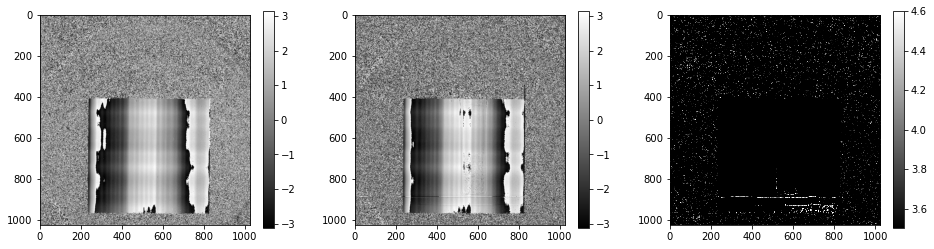

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.imshow(ob_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(sample1_phase, cmap='gray')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow((sample1_phase-ob_phase)%(2*np.pi), cmap='gray')
plt.clim(3.5, 4.6)
plt.colorbar()

### Plot Dark field

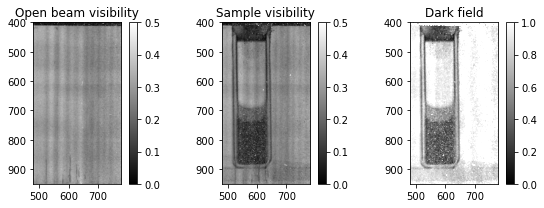

In [37]:
plt.figure(figsize=(8,3))
plt.subplot(1,3,1)
plt.title('Open beam visibility')
plt.imshow(ob_vis, cmap='gray')
plt.colorbar()
plt.clim(0, .5)
xlims = 480, 780
ylims = 950, 400
plt.xlim(*xlims); plt.ylim(*ylims)
plt.subplot(1,3,2)
plt.title('Sample visibility')
plt.imshow(sample1_vis, cmap='gray')
plt.colorbar()
plt.xlim(*xlims); plt.ylim(*ylims)
plt.clim(0, .5)
plt.subplot(1,3,3)
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')
plt.xlim(*xlims); plt.ylim(*ylims)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

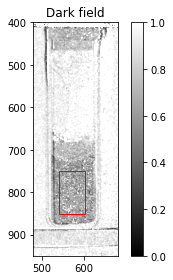

In [19]:
fig, ax = plt.subplots(figsize=(4,4))
plt.title('Dark field')
plt.imshow(sample1_vis/ob_vis, cmap='gray')

import matplotlib.patches as patches
rect = patches.Rectangle((540, 750), 62, 101, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.xlim(*xlims); plt.ylim(*ylims)
plt.clim(0, 1)
plt.colorbar()
plt.tight_layout()

# Compute all

In [20]:
files = glob.glob("/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/*.hdf")

In [21]:
sample_files = sorted(files)[:]
#sample_files

In [22]:
sample_vis_images = {}
for f in sample_files:
    print(f)
    sample1data = h5py.File(f)['entry']['data']['data']
    k = os.path.basename(f)
    k = k.split('000')[-1].rstrip('.hdf')
    print(k)
    try:
        o1, a_s1, a_c1 = calcPhase(sample1data, niter=1)
    except:
        print(f"{f}: failed")
        sample_vis_images[k] = None
        continue
    # sample1_phase = np.arctan2(-a_c1, a_s1)
    a1 =  np.sqrt(a_c1*a_c1+a_s1*a_s1)
    sample1_phase = np.arctan2(-a_c1, a_s1)
    sample1_vis = a1/o1
    sample_vis_images[k]=sample1_vis

/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000551.hdf
551
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000554.hdf
554
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000556.hdf
556
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000558.hdf
558
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000560.hdf
560
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000562.hdf
562
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000564.hdf
564
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000566.hdf
566
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000568.hdf
568
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/boa2021n000570.hdf
570
/data/97n/STS/cupid/ngi/PSI/2021_nGI_BOA/05_samples_M_655/SampleStack/

In [23]:
keys = sorted(list(sample_vis_images.keys()))
len(keys)

36

In [24]:
Ls = [145-np.array(h5py.File(f)['entry/table5/sgtz']).mean()+6 for f in sample_files] # in mm
Ls = np.array(Ls)*1e-3 # in m
Ls*100

array([ 0.6 ,  0.85,  1.1 ,  1.35,  1.6 ,  1.85,  2.1 ,  2.35,  2.6 ,
        2.85,  3.1 ,  3.35,  3.6 ,  3.85,  4.1 ,  4.35,  4.6 ,  4.85,
        5.1 ,  5.6 ,  6.1 ,  6.6 ,  7.1 ,  7.6 ,  8.1 ,  8.6 ,  9.1 ,
        9.6 , 10.1 , 10.6 , 11.1 , 11.6 , 12.1 , 12.6 , 13.6 , 15.1 ])

In [25]:
wl = 2.8e-10
wl = 3.75e-10
p = 13e-6
p = 25e-6
xi = wl*Ls/p
xi*1e6

array([0.09  , 0.1275, 0.165 , 0.2025, 0.24  , 0.2775, 0.315 , 0.3525,
       0.39  , 0.4275, 0.465 , 0.5025, 0.54  , 0.5775, 0.615 , 0.6525,
       0.69  , 0.7275, 0.765 , 0.84  , 0.915 , 0.99  , 1.065 , 1.14  ,
       1.215 , 1.29  , 1.365 , 1.44  , 1.515 , 1.59  , 1.665 , 1.74  ,
       1.815 , 1.89  , 2.04  , 2.265 ])

In [26]:
sl = slice(760, 840), slice(540, 600)
obv = np.mean(ob_vis[sl])

sv = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sv.append(np.mean(im[sl]))
    else:
        sv.append(None)

x = []; y = []
for x1,y1 in zip(xi, sv):
    if y1 is None: continue
    x.append(x1)
    y.append(y1)
x = np.array(x)
y = np.array(y)

y/obv

array([0.66604746, 0.636591  , 0.62477467, 0.57477158, 0.57003761,
       0.54979717, 0.5363914 , 0.51888291, 0.50370216, 0.49289399,
       0.47861324, 0.48148159, 0.4580734 , 0.45572172, 0.44230365,
       0.45362522, 0.44112366, 0.44447273, 0.42860553, 0.42137579,
       0.41315142, 0.4225598 , 0.42454954, 0.42852711, 0.4124845 ,
       0.40334687, 0.41116913, 0.40010465, 0.38969884, 0.4003346 ,
       0.40962427, 0.39442931, 0.40180231, 0.40174058, 0.38778747])

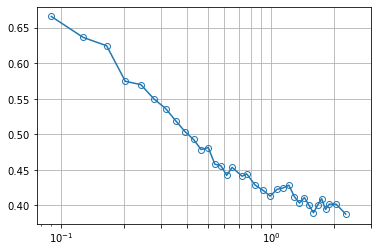

In [27]:
plt.figure()
plt.plot(x*1e6, y/obv, 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()

In [28]:
lnVs_over_V0_divby_lambdasq = np.log(y/obv)/wl/wl

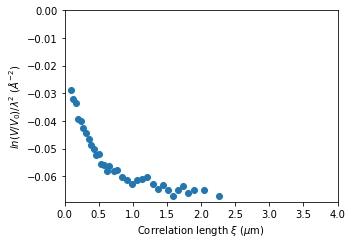

In [29]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 4)
plt.ylim(None, 0)
plt.tight_layout()

# Normalize by background near the sample

In [43]:
# sample_bg_sl = slice(760,840), slice(650, 650+62)
sample_bg_sl = slice(500,650), slice(540, 600)

sample_bg_v = []
for k in keys:
    im = sample_vis_images[k]
    if im is not None:
        sample_bg_v.append(np.mean(im[sample_bg_sl]))
    else:
        sample_bg_v.append(None)

sample_bg_y = []
for y1, sample_bg_y1 in zip(sv, sample_bg_v):
    if y1 is None: continue
    sample_bg_y.append(sample_bg_y1)
sample_bg_y = np.array(sample_bg_y)

sample_bg_y/obv

array([0.97284078, 0.98305729, 0.95297788, 0.95109616, 0.96665528,
       0.97643201, 0.98108049, 0.9805639 , 0.98269134, 0.97778523,
       0.96476932, 0.95875462, 0.94901715, 0.94904409, 0.9482014 ,
       0.95460848, 0.958396  , 0.97246157, 0.98518217, 0.99153235,
       0.99473822, 0.99765047, 1.00247521, 0.99960635, 0.99781683,
       0.99517458, 0.9938477 , 0.98515845, 0.98778859, 0.98852044,
       0.98604409, 0.98068957, 0.9784691 , 0.9801779 , 0.9701031 ])

Text(0, 0.5, '$V/V_0$')

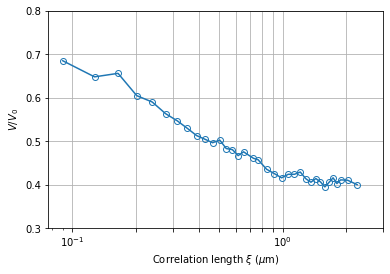

In [45]:
plt.figure()
plt.plot(x*1e6, (y/obv)/(sample_bg_y/obv), 'o-', mfc='none')
plt.xscale('log')
plt.xticks(list(np.arange(0.1, 1.01, 0.1)) + [2., 3.])
plt.grid()
plt.ylim(0.3, 0.8)
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
# plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.ylabel(r'$V/V_0$')

In [46]:
lnVs_over_V0_divby_lambdasq = np.log((y/obv)/(sample_bg_y/obv))/wl/wl

In [67]:
lnVs_over_V0 = np.log((y/obv)/(sample_bg_y/obv))

In [68]:
np.savetxt("lnVs_over_V0-stacked.dat", np.array([x*1e6, lnVs_over_V0]).T)

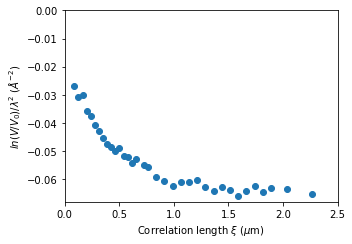

In [47]:
plt.figure(figsize=(5,3.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20, 'o')
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 2.5)
plt.ylim(None, 0)
plt.tight_layout()

These parameters are from Matteo

In [48]:
t1 = 5e-3
r1 = 0.35e-6
t2 = 2e-3
r2 = 1e-6
phi = 0.117
delta_rho = 129e12

### Trying fitting using two radii

For solution with particles of one single radius

$\ln \frac{V}{V0} = {\Sigma (G-1) t}$

$\Sigma_s = \frac{3}{2}\phi_V \Delta\rho^2\lambda^2 r$

or
$\ln \frac{V}{V0} = {\frac{3}{2}\phi_V \Delta\rho^2\lambda^2 r (G-1) t}$

or
$\ln \frac{V}{V0}/\lambda^2 = {\frac{3}{2}\phi_V \Delta\rho^2 t \times r (G-1) }$

For a solution of particles of two radii

$\ln \frac{V}{V0}/\lambda^2 = {\frac{3}{2}\phi_V \Delta\rho^2 \times \left[t_1 r_1 (G(\xi, r_1)-1) + t_2 r_2 (G(\xi, r_2)-1) \right] }$


In [49]:
def G(zeta):
    zeta2 = zeta*zeta
    return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))

/tmp/ipykernel_2064952/2097248867.py:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))
/tmp/ipykernel_2064952/2097248867.py:3: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))
/tmp/ipykernel_2064952/2097248867.py:3: RuntimeWarning: invalid value encountered in multiply
  return np.sqrt(1-zeta2/4)*(1+zeta2/8) + zeta2/2*(1-zeta2/16)*np.log(zeta/(2+np.sqrt(4-zeta2)))


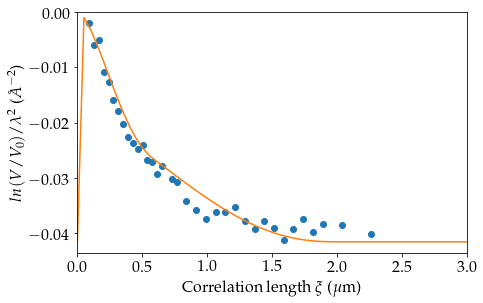

In [66]:
plt.figure(figsize=(7,4.5))
plt.plot(x*1e6, lnVs_over_V0_divby_lambdasq*1e-20+0.025, 'o')
t1 = 5e-3
r1 = 0.3e-6
t2 = 1.7e-3
r2 = 1.e-6
xprime = np.linspace(0, 5, 100)*1e-6
G1 = G(xprime/r1)
G1[G1!=G1]=0
G2 = G(xprime/r2)
G2[G2!=G2]=0
plt.plot(xprime*1e6, (2/3.)*phi*delta_rho*delta_rho*1e-20*(t1*r1*(G1-1)+t2*r2*(G2-1)))
plt.xlabel(r'Correlation length $\xi$ ($\mu$m)')
plt.ylabel(r'$ln(V/V_0)/\lambda^2$ ($\AA^{-2}$)')
plt.xlim(0, 3)
plt.ylim(None, 0)
plt.tight_layout()